In [1]:
from google_drive_ocr.application import GoogleOCRApplication
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import time

In [19]:
from google_drive_ocr.application import GoogleOCRApplication

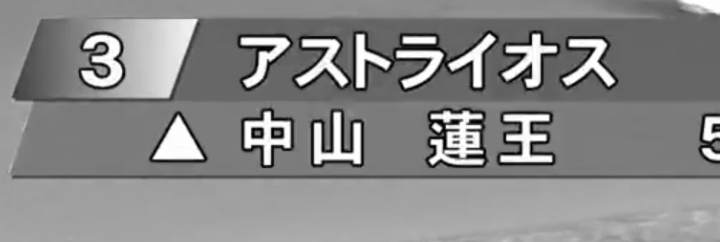

In [2]:
# 画像を開く
path = "uma.png"
img = Image.open(path).convert('L') 

# # 画像を切り抜く
# img = img.crop((320, 878, 390, 945))
img = img.crop((330, 778, 1050, 1020)) # (left, upper, right, lower)
output_path = "output_2.png"
img.save(output_path)
img

In [3]:
app = GoogleOCRApplication(r'client_secret.json')

app.perform_ocr(output_path)

<Status.ALREADY: 'Already done!'>

In [38]:
textPath = "output_2.google.txt" 
with open(textPath, encoding = 'UTF-8') as f:
    file_readlines = f.readlines()
if '中山' in file_readlines[-1:][0]:
    print('a')
# os.remove(textPath)

a


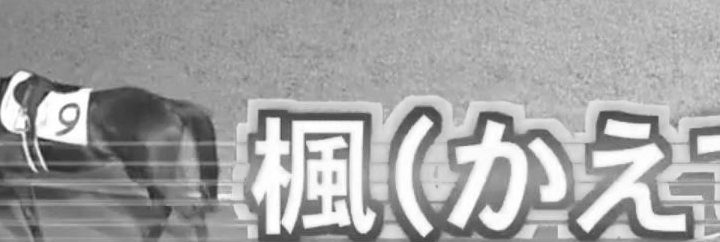

In [4]:
fileName = "movie/no2.mkv"
movieImg = "movie/No_1.jpg"
videoCapture = cv2.VideoCapture(fileName)
totalFrames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
success,image = videoCapture.read()
frameIndex = 500
if(frameIndex >= 0 & frameIndex < totalFrames):
        videoCapture.set(cv2.CAP_PROP_POS_FRAMES, frameIndex)
        ret, image = videoCapture.read()

plt.imsave(movieImg,image)
img = Image.open(movieImg).convert('L') 
img = img.crop((330, 778, 1050, 1020))
img
# while success:
#     cv2.imwrite("" % count, image)
#     success,image = videoCapture.read()
#     os.remove(movieImg)
#     count += 1

In [ ]:
# TODO API?をサービスに変更したから Google driver サービスなんかで調べる
app = GoogleOCRApplication('/client_secret.json')

fileName = "horse01.mp4"
movieImg = "/No_1.jpg"
output_path = "output.png"
textPath = "output.google.txt" 


jockeys = ['矢野', '藤本', '町田', '新原', '小林', '笹川', '本田', '増田', '西']

videoCapture = cv2.VideoCapture(fileName)
totalFrames = videoCapture.get(cv2.CAP_PROP_FRAME_COUNT)
success,image = videoCapture.read()
frameIndex = 0
count = 1
num = 0
while(frameIndex < totalFrames):
    if(frameIndex >= 0 & frameIndex < totalFrames):
            videoCapture.set(cv2.CAP_PROP_POS_FRAMES, frameIndex)
            ret, image = videoCapture.read()
            plt.imsave(movieImg,image)

            #保存した画像をグレー化してサイズ加工
            imgHorse = Image.open(movieImg).convert('L') 
            img = imgHorse.crop((330, 778, 1050, 1020)) # (left, upper, right, lower)
            img.save(output_path)

            # googleのOCR適用
            app.perform_ocr(output_path)
            
            # 出力されたtxtから指定した文字があるかを判別
            with open(textPath, encoding = 'UTF-8') as f:
                file_readlines = f.readlines()
            try:
                for jockey in jockeys:
                    if jockey in file_readlines[-1:][0]:
                        print(file_readlines[-1:][0])
                        imgHorse.save("/horse_{}.png".format(num))
                        num += 1
                        frameIndex += 30
            except:
                os.remove(movieImg)
                os.remove(textPath)
                print(str(count) + '回目 :' + str(frameIndex))
                count += 1
                frameIndex += 30
                continue
            os.remove(movieImg)
            os.remove(textPath)
            print(str(count) + '回目 :' + str(frameIndex))
            count += 1
            frameIndex += 30

In [7]:
textPath = "output.google.txt" 
os.remove(textPath)

In [2]:
os.system('saveMovie.bat')

if(os.path.exists('horse.ts')):
    os.system('changeFile.bat')
else:
    print("ファイルがありません")
    